In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [12]:
# Load the dataset without specifying column names
df = pd.read_csv('housing_boston.csv', header=None)

In [13]:
# Label the columns as 'column1' to 'column14'
df.columns = ['column1', 'column2', 'column3', 'column4', 'column5', 'column6', 'column7', 'column8', 'column9', 'column10', 'column11', 'column12', 'column13', 'column14']

In [14]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   column1  column2  column3  column4  column5  column6  column7  column8  \
0  0.00632     18.0     2.31        0    0.538    6.575     65.2   4.0900   
1  0.02731      0.0     7.07        0    0.469    6.421     78.9   4.9671   
2  0.02729      0.0     7.07        0    0.469    7.185     61.1   4.9671   
3  0.03237      0.0     2.18        0    0.458    6.998     45.8   6.0622   
4  0.06905      0.0     2.18        0    0.458    7.147     54.2   6.0622   

   column9  column10  column11  column12  column13  column14  
0        1       296      15.3    396.90      4.98      24.0  
1        2       242      17.8    396.90      9.14      21.6  
2        2       242      17.8    392.83      4.03      34.7  
3        3       222      18.7    394.63      2.94      33.4  
4        3       222      18.7    396.90      5.33      36.2  


In [15]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
column1     0
column2     0
column3     0
column4     0
column5     0
column6     0
column7     0
column8     0
column9     0
column10    0
column11    0
column12    0
column13    0
column14    0
dtype: int64


In [25]:
print("Column Names:", df.columns)

Column Names: Index(['column1', 'column2', 'column3', 'column4', 'column5', 'column6',
       'column7', 'column8', 'column9', 'column10', 'column11', 'column12',
       'column13', 'column14'],
      dtype='object')


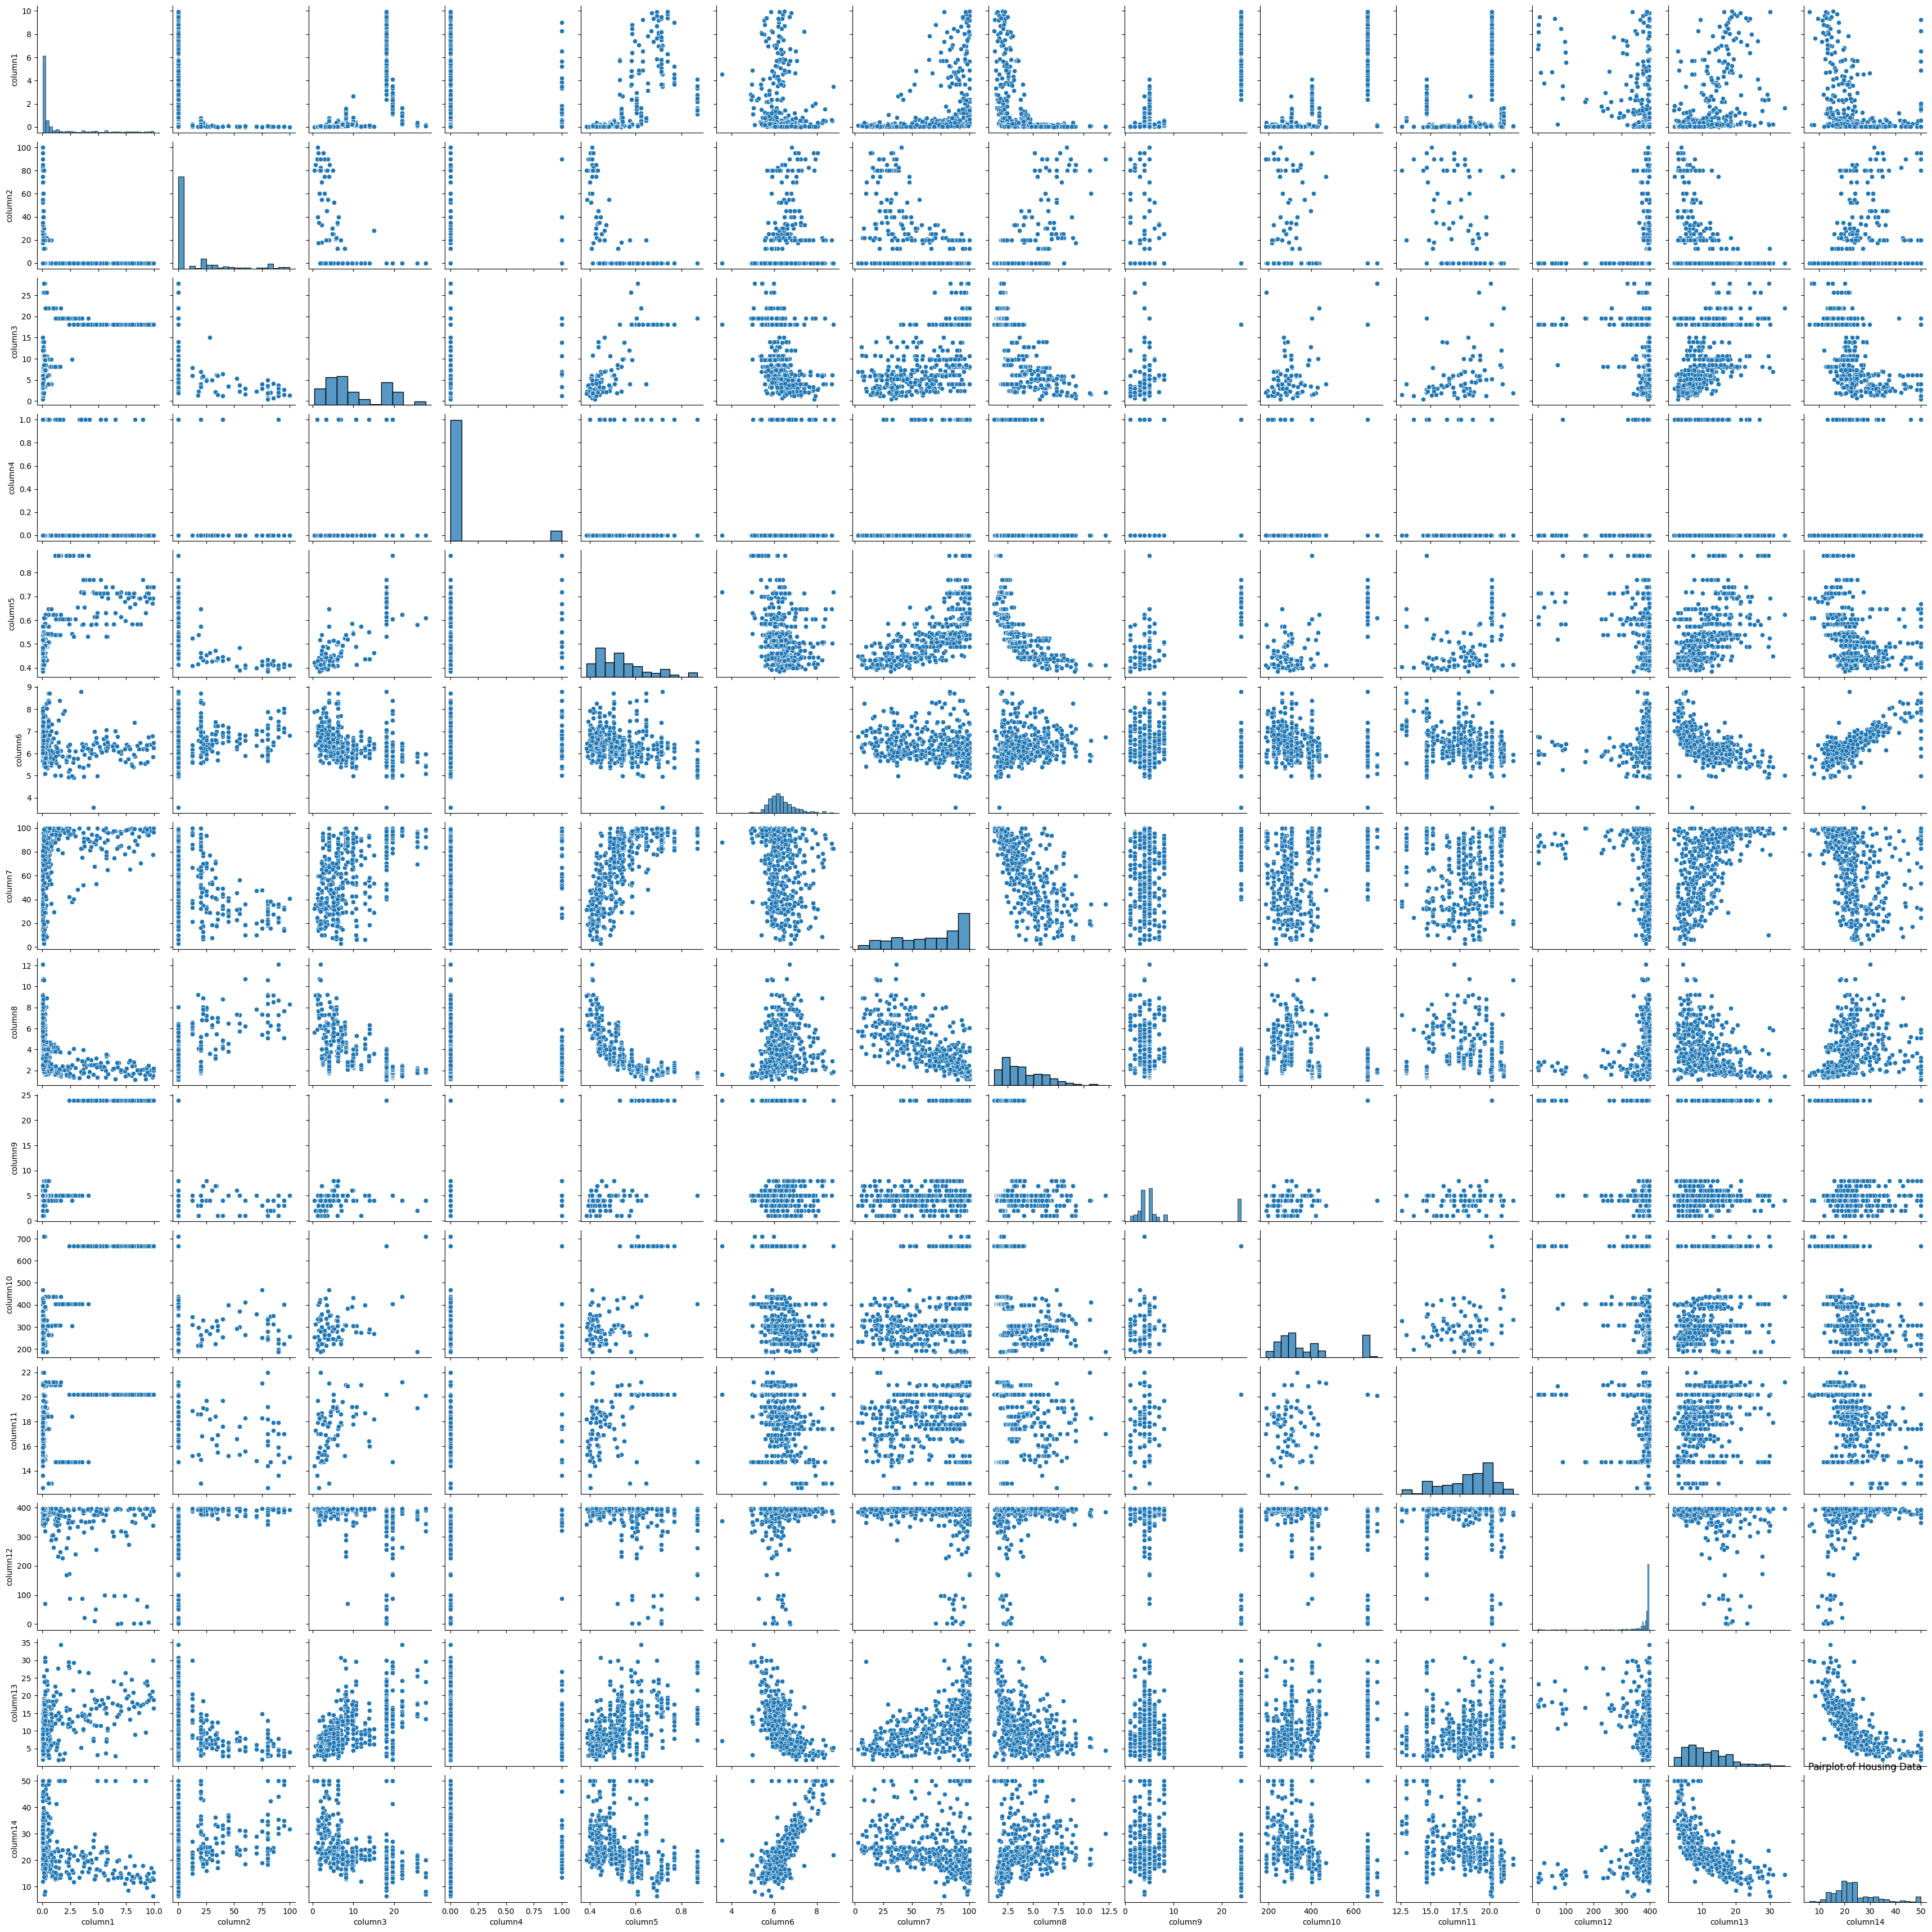

In [26]:
# Visualization 1: Pairplot
sns.pairplot(df)
plt.title('Pairplot of Housing Data')
plt.show()

In [17]:
# Separate predictors (features) and target variable
X = df.drop(columns=['column14'])  # Drop the target variable 'column14'
Y = df['column14']  # Set the target variable 'column14' as Y

In [18]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [20]:
# Test the model on the testing data
Y_pred = model.predict(X_test)

In [24]:
# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, X, Y, cv=10, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()
print("Mean Cross-Validation MSE:", mse_cv)

Mean Cross-Validation MSE: 30.12046153519838


In [21]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 20.97527480897776
R-squared: 0.6976755382220083


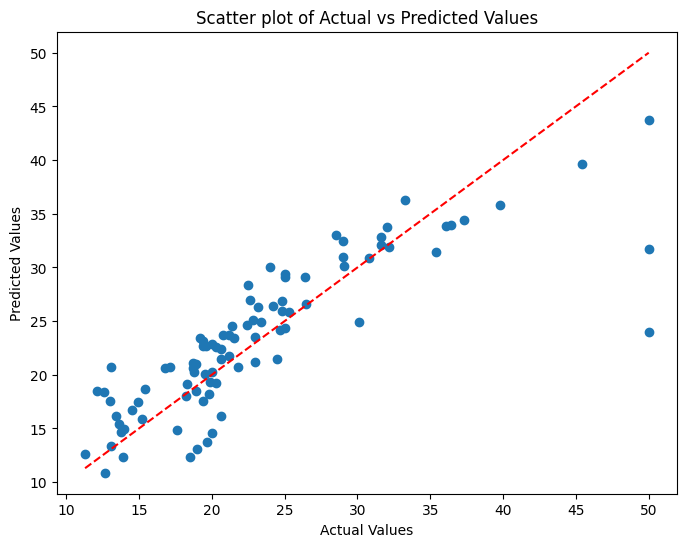

In [27]:
# Visualization 3: Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter plot of Actual vs Predicted Values')
plt.show()

In [22]:
# Create two new records for prediction
new_data = pd.DataFrame({
    'column1': [0.1, 0.05],
    'column2': [20, 30],
    'column3': [5, 10],
    'column4': [0, 1],
    'column5': [0.5, 0.3],
    'column6': [6, 7],
    'column7': [50, 60],
    'column8': [5, 7],
    'column9': [2, 4],
    'column10': [300, 400],
    'column11': [15, 20],
    'column12': [350, 400],
    'column13': [10, 15]
})

In [23]:
# Predict median housing prices for new records
new_predictions = model.predict(new_data)
print("Predictions for new records:")
for idx, prediction in enumerate(new_predictions):
    print(f"New Record {idx+1}: ${prediction:.2f}")

Predictions for new records:
New Record 1: $24.13
New Record 2: $24.71
